<a href="https://colab.research.google.com/github/flores-o/sd-x2-latent-upscaler-huggingface/blob/main/replicate_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install virtualenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 27.9 MB/s eta 0:00:00


In [2]:
!virtualenv myenv

created virtual environment CPython3.8.10.final.0-64 in 1783ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.0, setuptools==67.1.0, wheel==0.38.4
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [3]:
!source myenv/bin/activate

In [1]:
%pip install git+https://github.com/huggingface/diffusers.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-fiaz0bzj
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-fiaz0bzj
  Resolved https://github.com/huggingface/diffusers.git to commit 1e5eaca754bce676ce9142cab7ccaaee78df4696
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 10.2 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.14.0.dev0-py3-none-any.whl size=715947 sha256=aad21fad1911e5689cf10c19bea6b0191fc5e30662ae380c6a93bd48c851011c
  Stored in directory: /tmp/pip-ephem-wheel-cache-w46gkbup/wheels/28/16/cf/d8d37579fd1e7edb978252d850ec9328b055a7582ddfae3b87
Successfully built diffusers


In [2]:
%pip install transformers accelerate scipy safetensors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 35.8 MB/s eta 0:00:00


In [5]:
from google.colab import files
from PIL import Image
import io

# Upload an image file
uploaded = files.upload()

# Open the uploaded image file
img = Image.open(io.BytesIO(uploaded['input_image.png']))


Saving input_image.png to input_image (2).png


In [4]:
from diffusers import StableDiffusionLatentUpscalePipeline, StableDiffusionPipeline
import torch

pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipeline.to("cuda")

upscaler = StableDiffusionLatentUpscalePipeline.from_pretrained("stabilityai/sd-x2-latent-upscaler", torch_dtype=torch.float16)
upscaler.to("cuda")

prompt = "a photo of an astronaut high resolution, unreal engine, ultra realistic"
generator = torch.manual_seed(33)

# we stay in latent space! Let's make sure that Stable Diffusion returns the image
# in latent space
low_res_latents = pipeline(prompt, generator=generator, output_type="latent").images

upscaled_image = upscaler(
    prompt=prompt,
    image=low_res_latents,
    num_inference_steps=20,
    guidance_scale=0,
    generator=generator,
).images[0]

# Let's save the upscaled image under "upscaled_astronaut.png"
upscaled_image.save("astronaut_1024.png")

# as a comparison: Let's also save the low-res image
with torch.no_grad():
    image = pipeline.decode_latents(low_res_latents)
image = pipeline.numpy_to_pil(image)[0]

image.save("astronaut_512.png")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [5]:
! ls

astronaut_1024.png  astronaut_512.png  sample_data


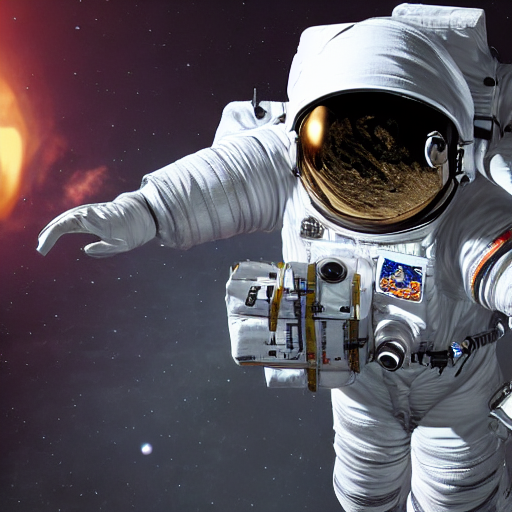

In [8]:
from IPython.display import Image
Image('astronaut_512.png')

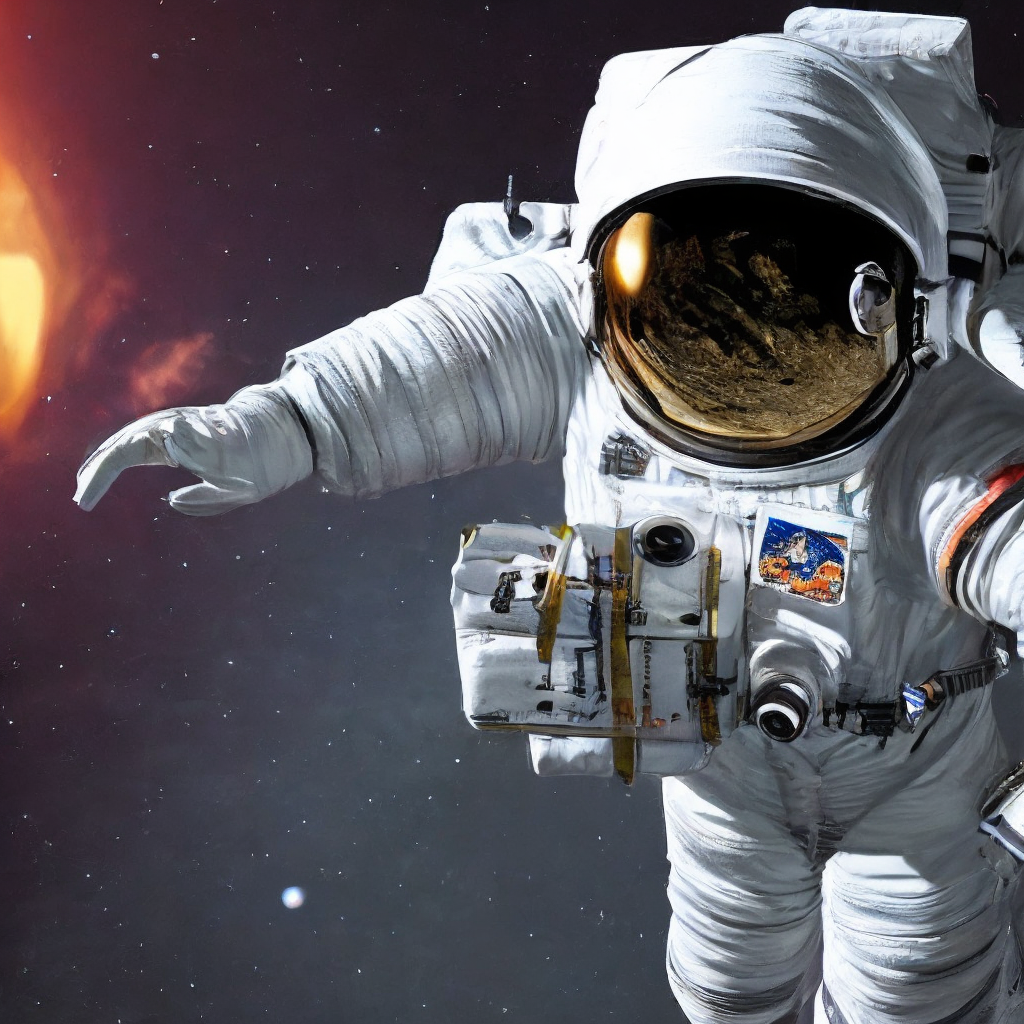

In [7]:
Image('astronaut_1024.png')

In [10]:
pip freeze

absl-py==1.4.0
accelerate==0.16.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.4
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==6.0.0
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
cftime==1.6.2
chardet==4.0.0
charset-normalizer==3.0.1
click==7.1.2
clikit==0.6.2
cloudpickle==2.2.1
cmake==3.22.6
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.0
cvxpy==1.2.3
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
daft==0.0.4
dask==2022.2.1
da

## Run StableDiffusionLatentUpscalePipeline with only an image as an input

In [6]:
from diffusers import StableDiffusionLatentUpscalePipeline, StableDiffusionPipeline
import torch

upscaler = StableDiffusionLatentUpscalePipeline.from_pretrained("stabilityai/sd-x2-latent-upscaler", torch_dtype=torch.float16)
upscaler.to("cuda")

prompt = "two cats, characters in a children book"
generator = torch.manual_seed(33)


upscaled_image = upscaler(
    prompt=prompt,
    image=img,
    num_inference_steps=20,
    guidance_scale=0,
    generator=generator,
).images[0]

# Let's save the upscaled image under "upscaled_astronaut.png"
upscaled_image.save("cats_1024.png")

img.save("cats_512.png")

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

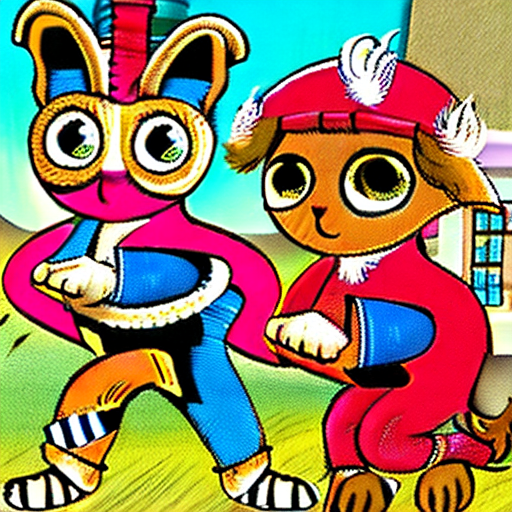

In [7]:
from IPython.display import Image
Image('cats_512.png')

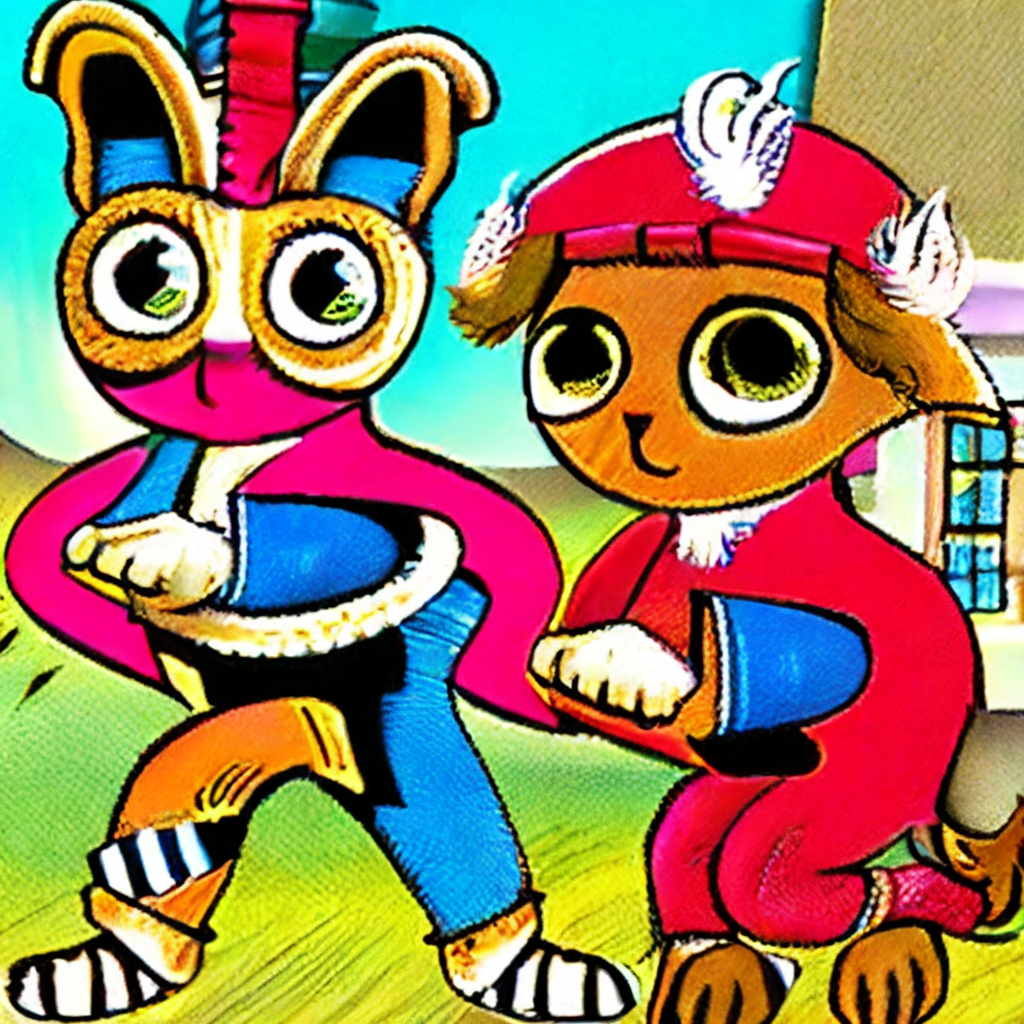

In [8]:
Image('cats_1024.png')